# Practica 07: Regresión Logística

Integrantes:

*   Carlos Daniel Cortés Jiménez
*   Sarah Sophía Olivares García
*   Marco Silva Huerta
*   Fernando Mendoza Eslava
*   Luis Enrique García Gómez
*   Laura Itzel Tinoco Miguel

**Problema a resolver**: Desarrollar un modelo predictivo que pueda estimar la probabilidad de abandono escolar en diferentes planteles de México, basándose en características como la entidad, el plantel y el periodo anual.


## 1. Carga y exploración datos

Describir la forma en que se hicieron los pasos del pdf.
Comentar el código para todas las funciones



In [149]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [150]:
# Importamos el documento a Colab.
from google.colab import files
uploaded = files.upload()

In [151]:


# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("cd_Abandono_Escolar_CONALEP_2023.csv", encoding='ISO-8859-1')

# Eliminar filas con valores faltantes
df_clean = df.dropna()

# Comprobar los tipos de datos de cada columna
tipos_de_datos = df.dtypes
print("Los tipos de datos de cada columna son:")
print(tipos_de_datos)
df.head()

Los tipos de datos de cada columna son:
cve_ent                           float64
entidad                            object
cve_plantel                       float64
plantel                            object
periodo_anual                      object
Porcentaje_de_abandono_escolar    float64
dtype: object


,cve_ent,entidad,cve_plantel,plantel,periodo_anual,Porcentaje_de_abandono_escolar
0,1.0,Aguascalientes,63.0,Aguascalientes II,2022-2023,8.5
1,1.0,Aguascalientes,284.0,Aguascalientes III,2022-2023,13.9
2,1.0,Aguascalientes,318.0,Aguascalientes IV,2022-2023,9.1
3,1.0,Aguascalientes,247.0,Ing. Miguel Ángel Barberena Vega,2022-2023,9.1
4,1.0,Aguascalientes,319.0,Pabellon de Arteaga,2022-2023,12.6


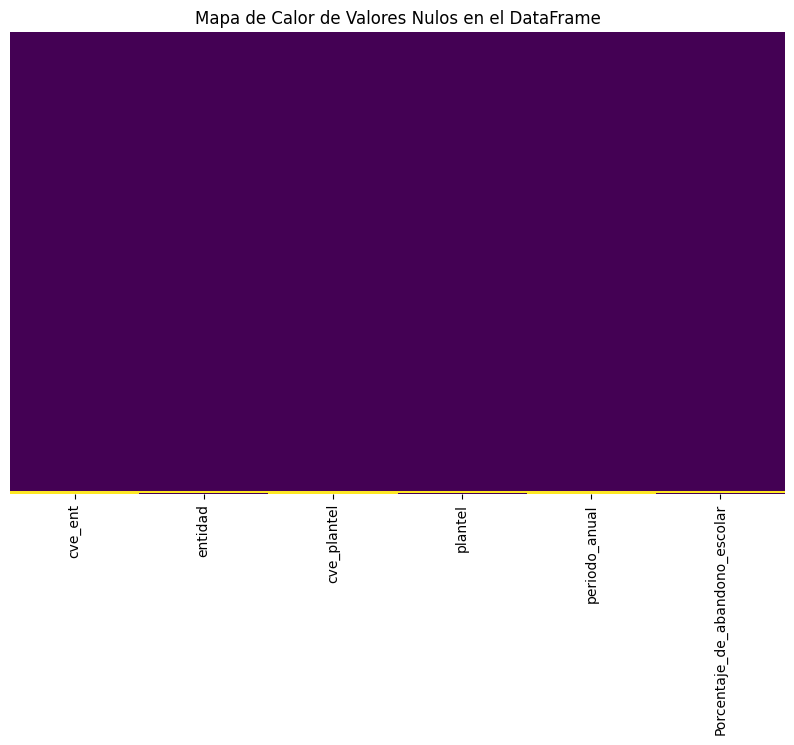

In [ ]:

# Crear un mapa de calor de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Mapa de Calor de Valores Nulos en el DataFrame')
plt.show()

In [ ]:
# Obtener un resumen estadístico de las variables numéricas
resumen_estadistico = df.describe()

# Mostrar el resumen estadístico
print("Resumen estadístico de las variables numéricas:")
print(resumen_estadistico)

Resumen estadístico de las variables numéricas:
          cve_ent  cve_plantel  Porcentaje_de_abandono_escolar
count  313.000000   313.000000                      314.000000
mean    16.386581   164.610224                       14.523885
std      7.989220    97.136773                        6.344113
min      1.000000     1.000000                        3.200000
25%     10.000000    81.000000                        9.700000
50%     15.000000   164.000000                       13.550000
75%     23.000000   243.000000                       18.675000
max     32.000000   340.000000                       37.400000


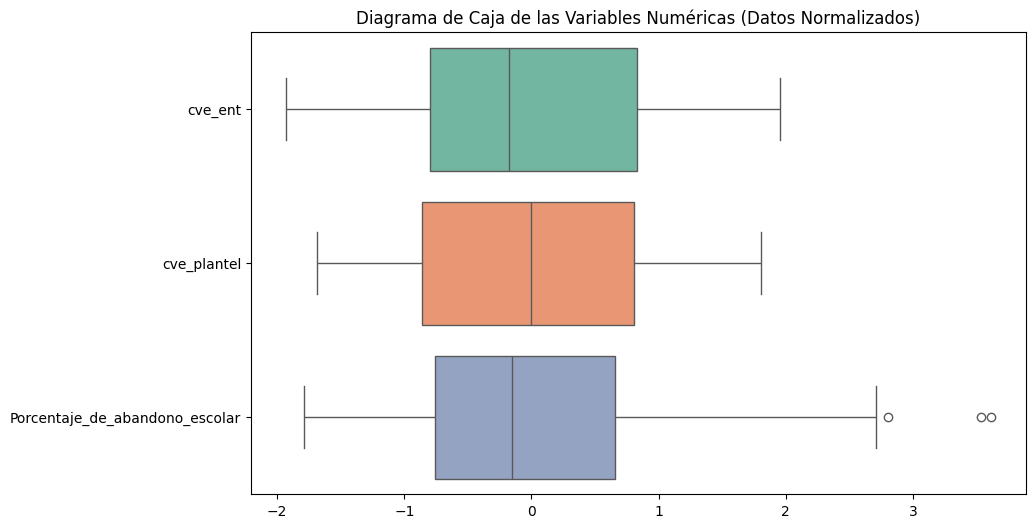

In [ ]:
from sklearn.preprocessing import scale

# Normalizar los datos numéricos
df_numeric = df.select_dtypes(include=['float64'])  # Seleccionar solo las columnas numéricas
df_normalized = pd.DataFrame(scale(df_numeric), columns=df_numeric.columns)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de caja con datos normalizados
sns.boxplot(data=df_normalized, orient='h', palette='Set2')

# Añadir un título
plt.title('Diagrama de Caja de las Variables Numéricas (Datos Normalizados)')

# Mostrar el gráfico
plt.show()


In [ ]:
# Agrupar los datos por entidad y calcular el promedio de abandono escolar por entidad
promedio_abandono_por_entidad = df.groupby('entidad')['Porcentaje_de_abandono_escolar'].mean()

# Mostrar el promedio de abandono escolar por entidad
print("Promedio de abandono escolar por entidad:")
print(promedio_abandono_por_entidad)
# Agrupar los datos por plantel y calcular el promedio de abandono escolar por plantel
promedio_abandono_por_plantel = df.groupby('plantel')['Porcentaje_de_abandono_escolar'].mean()

# Mostrar el promedio de abandono escolar por plantel
print("Promedio de abandono escolar por plantel:")
print(promedio_abandono_por_plantel)


Promedio de abandono escolar por entidad:
entidad
Aguascalientes          11.542857
Baja California         18.833333
Baja California Sur     14.550000
CONALEP                 15.000000
Campeche                15.900000
Chiapas                 16.791667
Chihuahua               21.862500
Ciudad de México        25.459259
Coahuila de Zaragoza     8.733333
Colima                  14.633333
Durango                 27.600000
Guanajuato              13.187500
Guerrero                14.300000
Hidalgo                 13.633333
Jalisco                 15.644444
Michoacán de Ocampo     13.869231
Morelos                 18.180000
México                   9.787179
Nayarit                 19.675000
Nuevo León              16.000000
Oaxaca                  18.920000
Puebla                  11.020000
Querétaro de Arteaga    10.480000
Quintana Roo             9.350000
San Luis Potosí         12.900000
Sinaloa                  9.962500
Sonora                  15.928571
Tabasco                  9.37142

## 2. Visualización y análisis de datos

Describir la forma en que se hicieron los pasos del pdf.
Comentar el código para todas las funciones


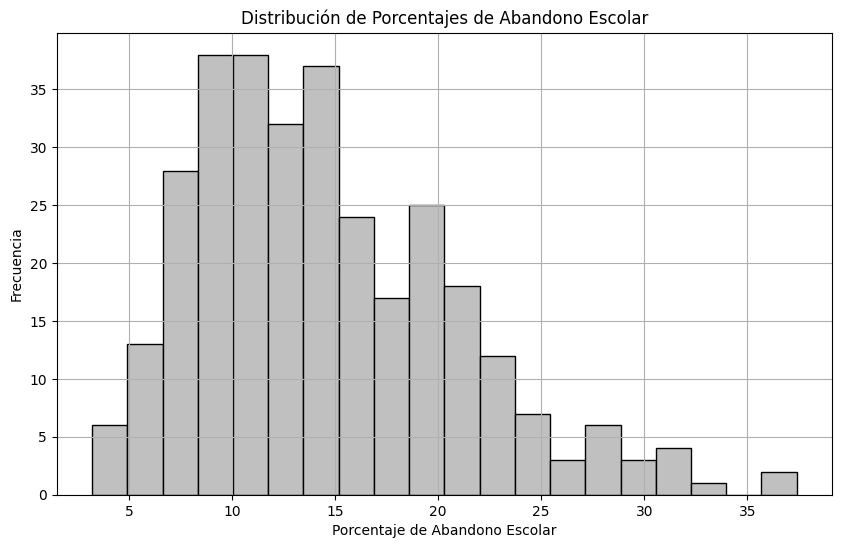

In [ ]:
# 2.1 Utiliza un histograma para visualizar cómo se distribuyen los porcentajes
#  de abandono escolar entre los planteles educativos

plt.figure(figsize=(10, 6))
plt.hist(df['Porcentaje_de_abandono_escolar'], bins=20, color='silver', edgecolor='black')
plt.xlabel('Porcentaje de Abandono Escolar')
plt.ylabel('Frecuencia')
plt.title('Distribución de Porcentajes de Abandono Escolar')
plt.grid(True)
plt.show()

# Entonces vemos la tendencia en el porcentaje del abandono escolar con una frecuencia
#  más marcada entre 9% a 15%, no hay realemte un pico demaciado alto o bajo dentro
#  del histograma para considerarlo importante

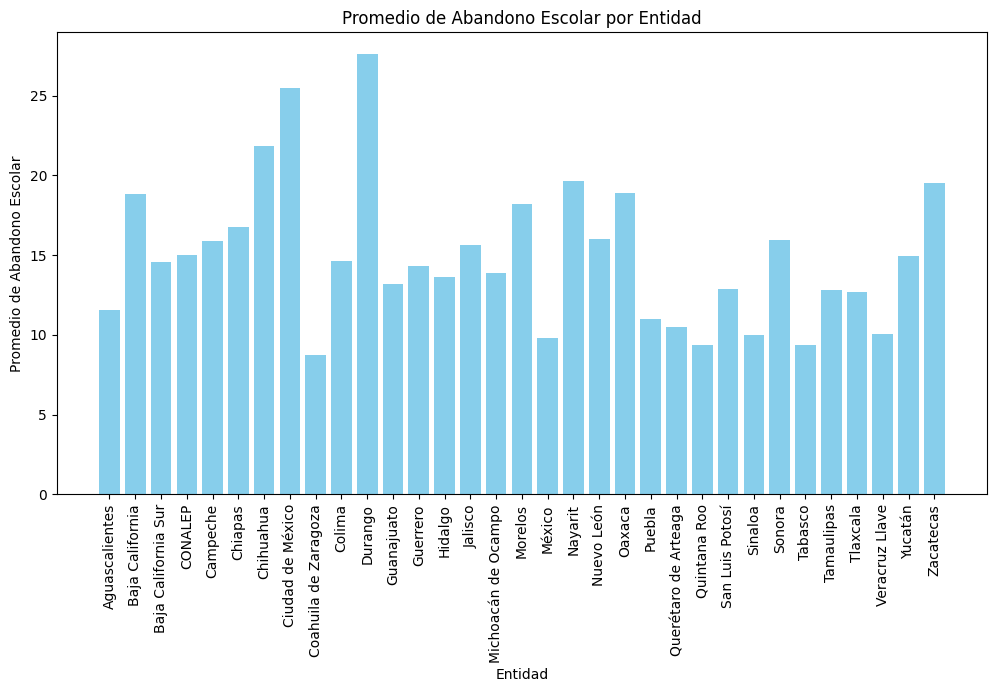

In [ ]:
# 2.2 Utiliza matplotlib o seaborn para dibujar un gráfico de barras que muestre el promedio de abandono escolar por entidad.

# Calcula el promedio de abandono escolar por entidad
promedio_abandono_por_entidad = df.groupby('entidad')['Porcentaje_de_abandono_escolar'].mean().reset_index()

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Dibuja el gráfico de barras
plt.bar(promedio_abandono_por_entidad['entidad'], promedio_abandono_por_entidad['Porcentaje_de_abandono_escolar'], color='skyblue')

# Etiqueta los ejes y agrega el título
plt.xlabel('Entidad')
plt.ylabel('Promedio de Abandono Escolar')
plt.title('Promedio de Abandono Escolar por Entidad')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()


<ipython-input-138-04508d8fcccb>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='plantel', y='Porcentaje_de_abandono_escolar', data=planteles_variabilidad, palette='coolwarm')


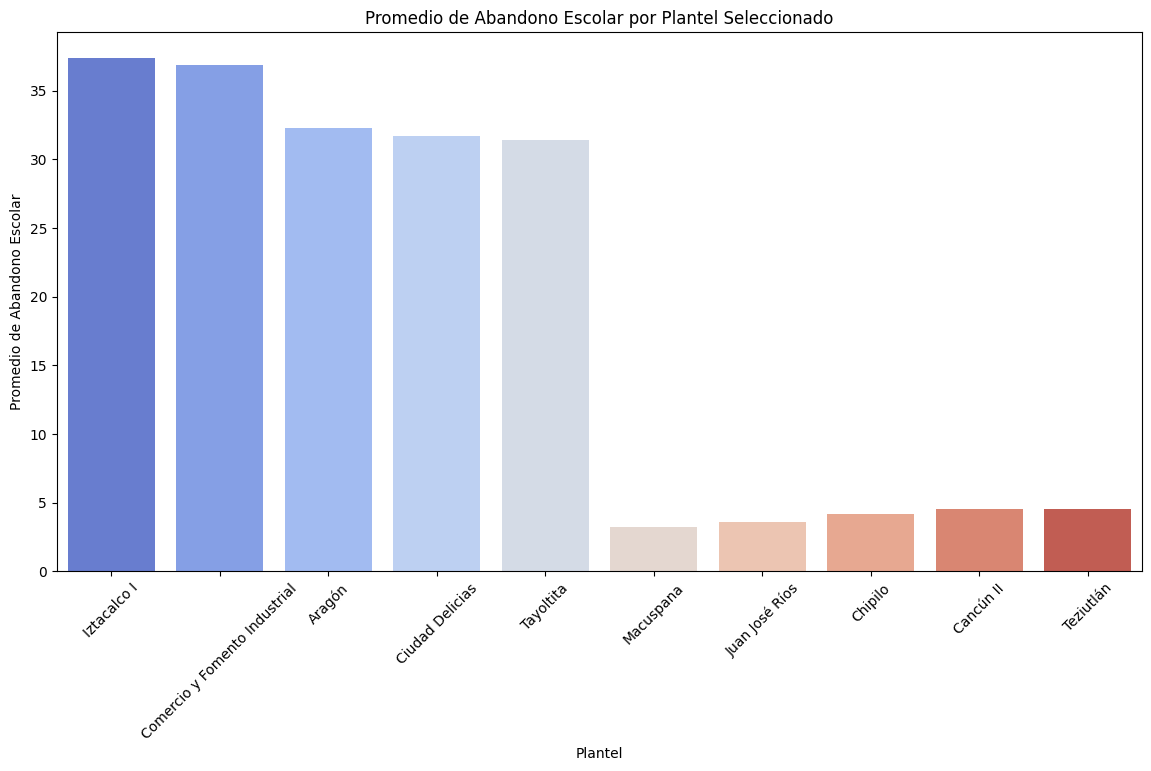

In [ ]:
# 2.3 Selecciona algunos planteles que representen variabilidad en el abandono escolar y dibuja un gráfico similar al de las entidades.


# Eliminar filas con valores faltantes
df_clean = df.dropna()

# Aquí comienza la nueva sección para seleccionar planteles con alta y baja variabilidad en el abandono escolar
# Agrupa los datos por plantel y calcula el promedio de abandono escolar por plantel
promedio_abandono_por_plantel = df_clean.groupby('plantel')['Porcentaje_de_abandono_escolar'].mean().reset_index()

# Ordena los resultados y selecciona los planteles con los valores más altos y más bajos para mostrar variabilidad
planteles_con_mayor_abandono = promedio_abandono_por_plantel.nlargest(5, 'Porcentaje_de_abandono_escolar')
planteles_con_menor_abandono = promedio_abandono_por_plantel.nsmallest(5, 'Porcentaje_de_abandono_escolar')
planteles_variabilidad = pd.concat([planteles_con_mayor_abandono, planteles_con_menor_abandono])

# Configura el tamaño del gráfico
plt.figure(figsize=(14, 7))

# Dibuja el gráfico de barras
sns.barplot(x='plantel', y='Porcentaje_de_abandono_escolar', data=planteles_variabilidad, palette='coolwarm')

# Etiqueta los ejes y agrega el título
plt.xlabel('Plantel')
plt.ylabel('Promedio de Abandono Escolar')
plt.title('Promedio de Abandono Escolar por Plantel Seleccionado')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()

2.4 ¿Puedes identificar algún patrón o cambio significativo en los datos? Cada uno de los integrantes debe dar su análsis.

*   Carlos Daniel Cortés Jiménez:
*   Sarah Sophía Olivares García:
*   Marco Silva Huerta:
*   Fernando Mendoza Eslava:
*   Luis Enrique García Gómez:
*   Laura Itzel Tinoco Miguel:


## 3. Creación del modelo de regresión logística


3.1 seleccionar las variables independientes para el modelo.

1. Entidad (cve_ent):

 * La entidad influye debido a factores sociales, políticos, educativos y recursos de estructura (escuelas o materiales) disponibles que varían de una entidad a otra.

2. Plantel(cve_plantel):

 * Cada plantel puede aplicar el programa a su manera, la calidad de los profesores y la comuniadad general interviene en el abandono escolar.

3. Periodo Anual(periodo_anual)

 * Considere el tiempo porque puede ser que en años recientes existan apoyos como becas o no becas (u otro tipo circustancias que se dan en determinadaso años, como elecciones), por eso dependiendo el año será un factor a considerar para el abandono escolar


3.2 Utiliza train_test_split para dividir el conjunto de datos en dos: un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

* X_train, X_test: Variables independientes para entrenamiento y pruebas.
* y_train, y_test: Variables dependientes para entrenamiento y pruebas.
* test_size: Este valor igualado a 0.2 es el 20% de datos para pruebas y así deja el 80% para entrenamiento


In [ ]:
# Eliminar filas con valores faltantes en la variable dependiente
df_clean = df.dropna(subset=['Porcentaje_de_abandono_escolar'])

# Convertir 'periodo_anual' a valores numéricos (usando el primer año del rango)
def convertir_periodo_anual(valor):
    if isinstance(valor, str):
        return int(valor.split('-')[0])
    else:
        return valor

df['periodo_anual'] = df['periodo_anual'].apply(convertir_periodo_anual)

# Seleccionar las variables independientes y dependiente
varInd = df[['cve_ent', 'cve_plantel', 'periodo_anual']] # Variables inependientes
varDep = df['Porcentaje_de_abandono_escolar']  # Variable dependiente
# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(varInd, varDep, test_size=0.2, random_state=50)


# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print('Dimensiones del conjunto de entrenamiento:')
# Vemos como el valor del total de datos es ((316)*(0.8)) = 250 (por limpieza de datos)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Dimensiones del conjunto de prueba:')
# Vemos como el valor del total de datos es ((316)*(0.2)) = 63
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Dimensiones del conjunto de entrenamiento:
X_train: (252, 3)
y_train: (252,)
Dimensiones del conjunto de prueba:
X_test: (63, 3)
y_test: (63,)


In [155]:
# 3.3 Utiliza sklearn.linear_model.LogisticRegression para crear una instancia del modelo de regresión logística de scikit-learn

# Convertir la variable objetivo a enteros
#   Esto es para trabajar con números enteros dentro del
#   modelo de regresión logística ya que los porcentajes
#   del dataFrame estan como valores flotantes
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Creamos la instancia del modelo de regresión logística
#  - random_state: asegura que los resultados sean reproducibles
#  - solver      : método de optimización utilizado para entrenar el modelo
#  - max_iter    : número máximo de iteraciones (1000, no fueron suficientes)
modelo_logistico = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)

# Entrenamos el modelo de regresión logística utilizando los datos de entrenamiento
modelo_logistico.fit(X_train, y_train)

# Revisar los coeficientes del modelo
# Después de entrenar el modelo, extraemoos los coeficientes
#  - modelo_logistico.coef_ contiene los coeficientes de las variables independientes
#     que indican la importancia de cada variable en la predicción.
coeficientes = modelo_logistico.coef_[0]
variables_independientes = varInd.columns

# Finalmente se crea un DataFrame de pandas con los coeficientes y las variables independientes
df_coeficientes = pd.DataFrame(coeficientes, index=variables_independientes, columns=['Coeficiente'])
print(df_coeficientes)

               Coeficiente
cve_ent           0.229393
cve_plantel       0.008123
periodo_anual    -0.002107


* cve_ent           0.271850
La probabilidad positiva nos dice que para ciertas entidades pueden existir condiciones o factores que contribuyen a un mayor riesgo de abandono escolar


* cve_plantel      -0.020735
Aquí la probabilidad es negativa, eso nos puede decir que algunas escuelas si se preocupan y mejoran las condiciones para reducir el abandono escolar


* periodo_anual    -0.002167
Y como mencione en la elección de esta varibale, depende del año que puede pasar que escuelas reciban algún apoyo para que los alumnos continuen


3.4 Usa los métodos .predict() y .predict_proba() para realizar predicciones sobre el conjunto de prueba.

- .predict()
  *  Se utiliza para predecir la clase o valor objetivo para nuevos datos no vistos durante el entrenamiento del modelo. Es decir, toma un conjunto de datos de entrada y genera las predicciones correspondientes a la variable objetivo.

- .predict_proba()
  * proporciona las probabilidades predichas para cada clase o valor objetivo. A diferencia de .predict(), que solo proporciona una clasificación discreta


En la regresión logística, .predict_proba() devuelve un vector de dos probabilidades para cada punto de datos de entrada: la probabilidad positiva (alto riesgo de abandono escolar) y probabilidad negativa (bajo riesgo de abandono escolar).

In [ ]:
X_test = X_test.dropna()


# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo_logistico.predict(X_test)
y_pred_proba = modelo_logistico.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva (abandono escolar)

# Comparar las predicciones con los valores reales
df_predicciones = pd.DataFrame({'Indice - Valor Real': y_test, 'Predicción': y_pred, 'Probabilidad Clase Positiva': y_pred_proba}, index=X_test.index)

# Agregar una columna para determinar si la predicción es adecuada
def calcular_proba_abandono(row):
    if row['Predicción'] >= row['Indice - Valor Real']:
        return 'Alto'
    else:
        return 'Bajo'

df_predicciones['Proba Abandono'] = df_predicciones.apply(calcular_proba_abandono, axis=1)

print(df_predicciones.head(5))  # Mostrar las primeras 5 filas para una primera impresión


     Indice - Valor Real  Predicción  Probabilidad Clase Positiva  \
74                   8.7          10                     0.007988   
8                   22.6          10                     0.007298   
81                  15.3           9                     0.003238   
166                  9.3          10                     0.015255   
25                  16.2          10                     0.007989   

    Proba Abandono  
74            Alto  
8             Bajo  
81            Bajo  
166           Alto  
25            Bajo  


## 4. Evaluación del modelo

Describir la forma en que se hicieron los pasos del pdf.
Comentar el código para todas las funciones
